In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

countryData = pd.read_csv('data/Country-data.csv')
countryData

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [198]:
print('Аналіз даних')
countryData.info()

Аналіз даних
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [199]:
countryData.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [200]:
countryData.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [201]:
countryData.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [202]:
countryData.nlargest(10, ['inflation'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100
165,Yemen,56.3,30.0,5.18,34.4,4480,23.6,67.5,4.67,1310
140,Sri Lanka,11.2,19.6,2.94,26.8,8560,22.8,74.4,2.20,2810
3,Angola,119.0,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530
5,Argentina,14.5,18.9,8.10,16.0,18700,20.9,75.8,2.37,10300
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,334


In [203]:
countryData.nsmallest(10, ['inflation'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
85,Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11300
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700
86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8860


C:\Users\romac\AppData\Local\Temp\ipykernel_17364\740300831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = countryData.corr()


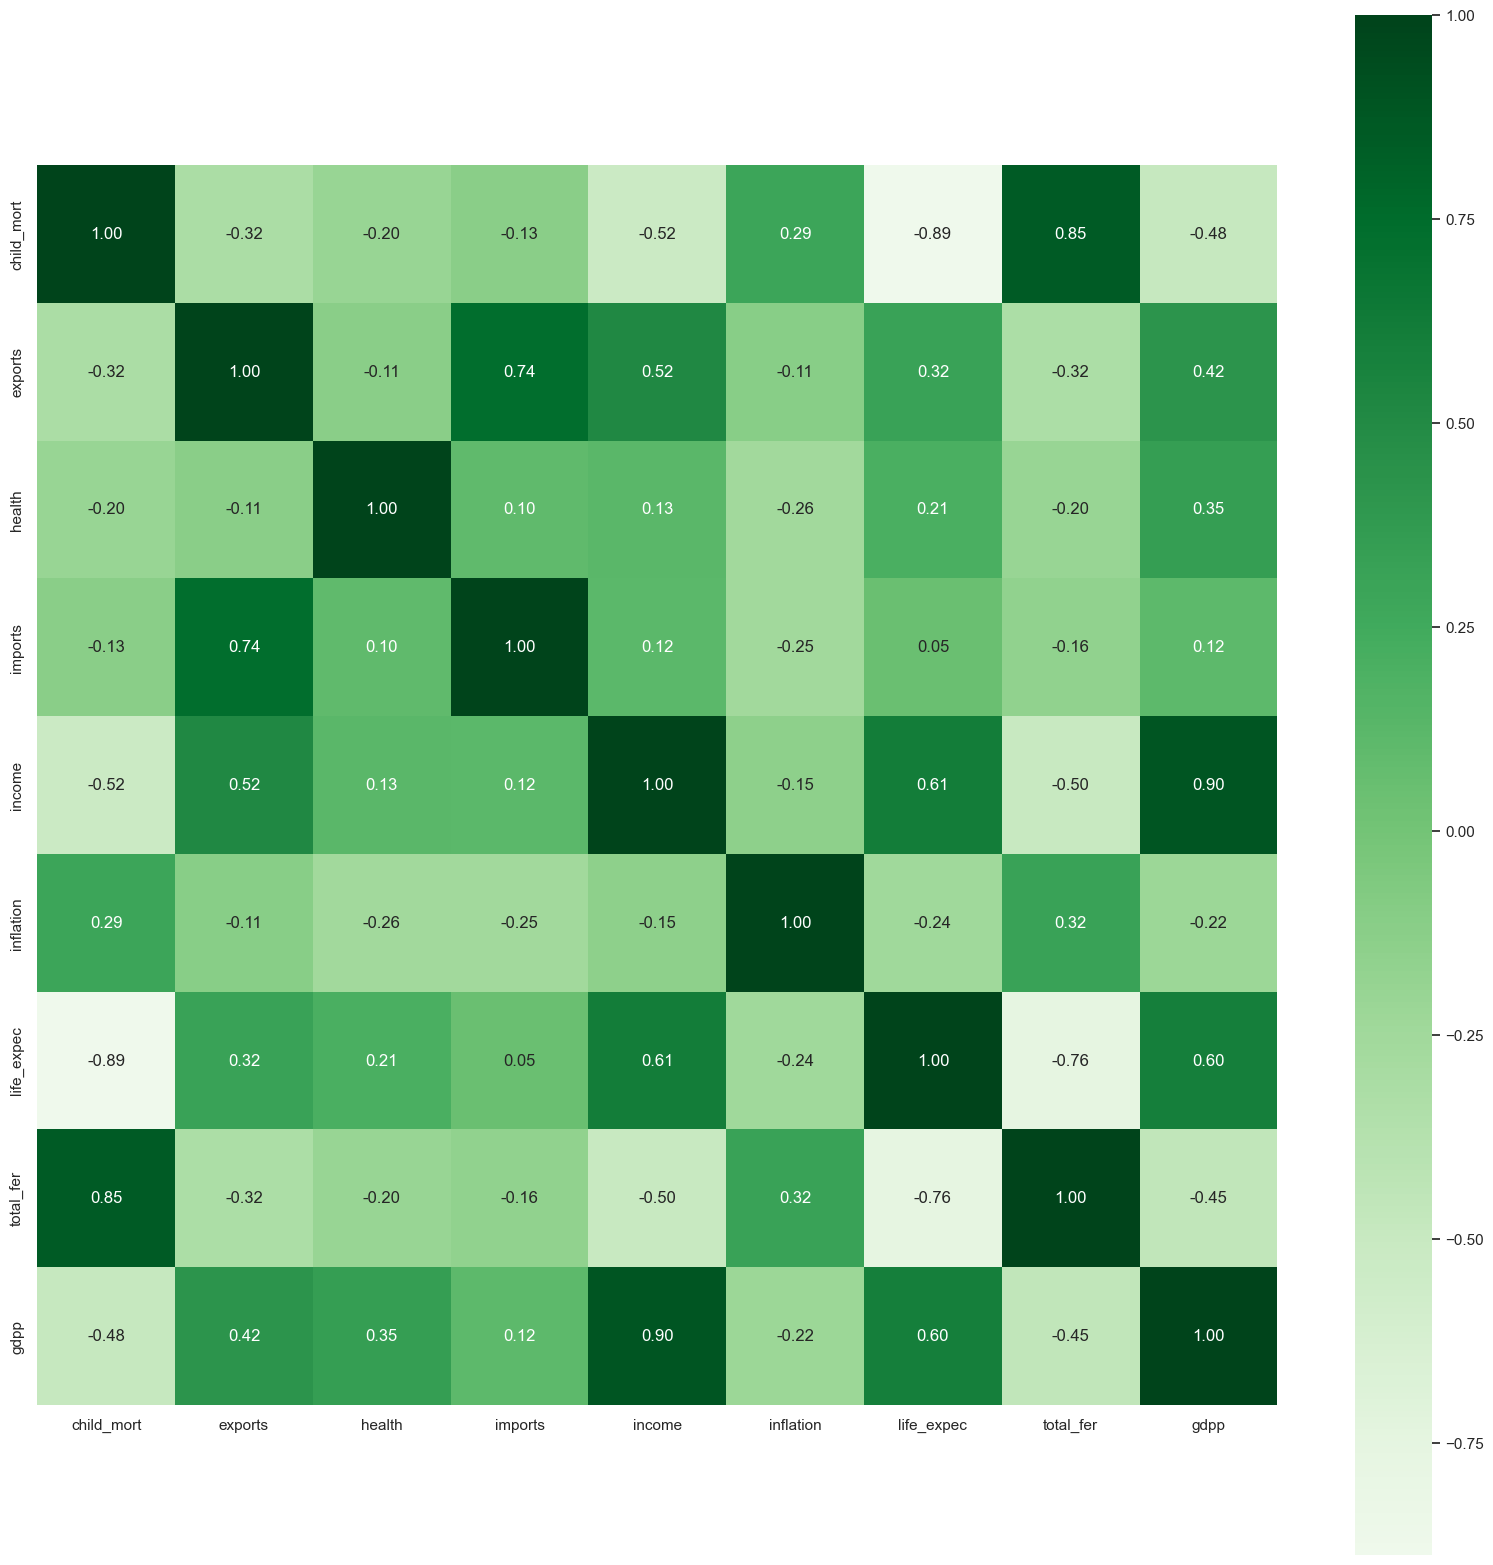

In [204]:
corrs = countryData.corr()
plt.figure(figsize=(20,20))
cmap = sns.color_palette("Greens", as_cmap=True)
h1 = sns.heatmap(corrs, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

In [205]:
print('Однофакторний аналіз')


Однофакторний аналіз


<AxesSubplot: xlabel='life_expec', ylabel='Count'>

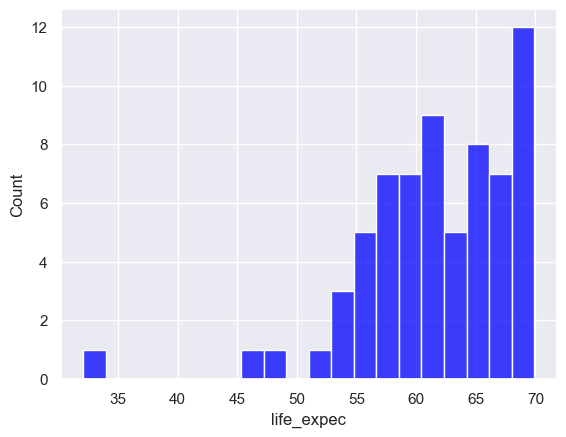

In [206]:
sns.histplot(data=countryData[countryData['life_expec']<70], x='life_expec', color="blue", bins = 20)

<AxesSubplot: xlabel='life_expec'>

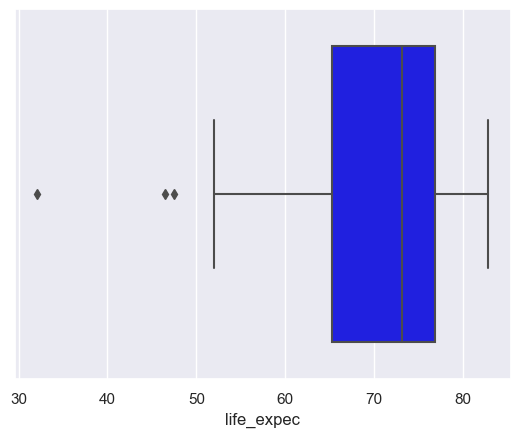

In [207]:
sns.boxplot(x=countryData['life_expec'], color = 'blue')

<AxesSubplot: xlabel='inflation', ylabel='Count'>

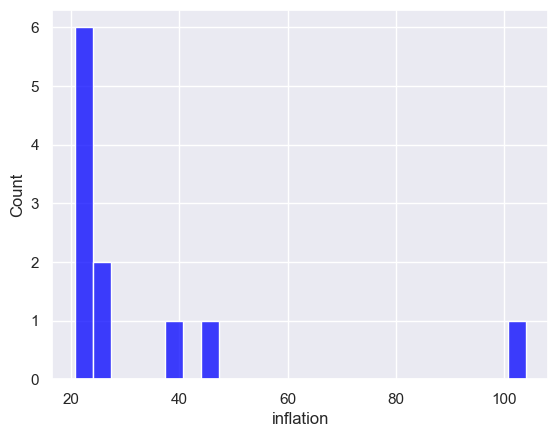

In [208]:
sns.histplot(data=countryData[countryData['inflation'] > 20], color="blue", bins = 25, x = "inflation")

<AxesSubplot: xlabel='inflation'>

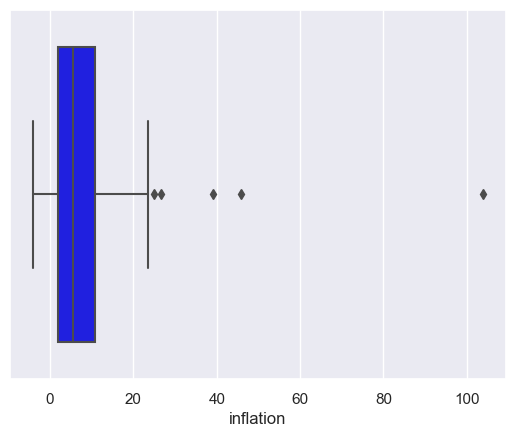

In [209]:
sns.boxplot(x=countryData['inflation'], color = 'blue')

<AxesSubplot: xlabel='gdpp', ylabel='Count'>

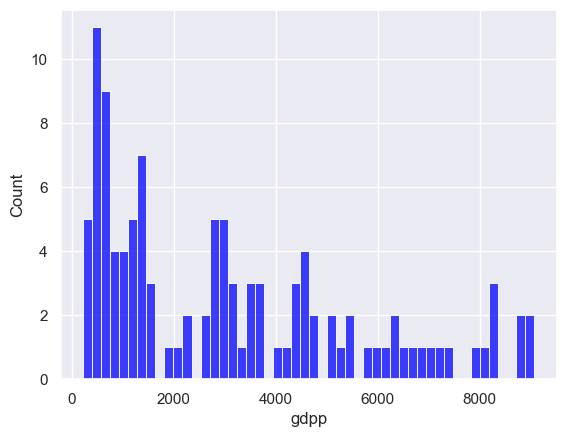

In [210]:
sns.histplot(data=countryData[countryData['gdpp'] < 10000], x="gdpp", color="blue", bins = 50)

Двофакторний аналіз


<AxesSubplot: xlabel='life_expec', ylabel='inflation'>

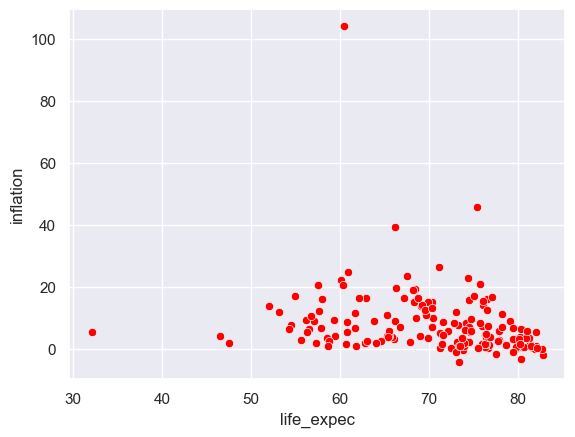

In [211]:
print('Двофакторний аналіз')

sns.scatterplot(data = countryData, x = "life_expec", y = "inflation", color = 'red')

<AxesSubplot: xlabel='life_expec', ylabel='inflation'>

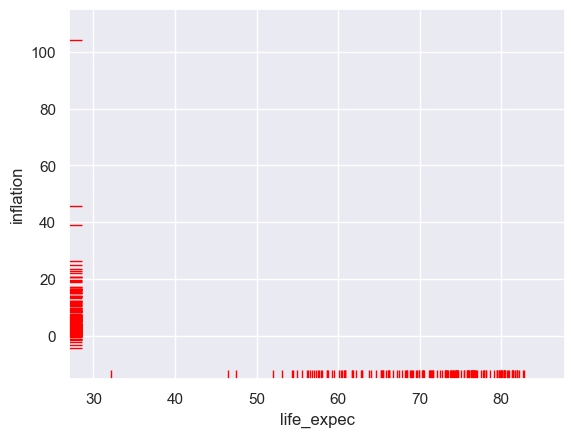

In [212]:
sns.rugplot(data = countryData, x = "life_expec", y = "inflation", color = 'red')

<AxesSubplot: xlabel='child_mort', ylabel='health'>

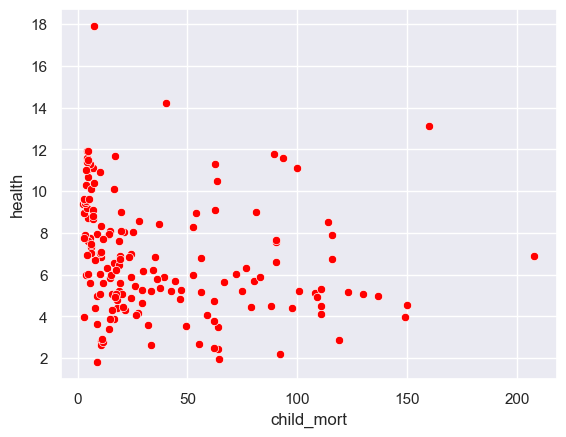

In [213]:
sns.scatterplot(data = countryData, x = "child_mort", y = "health", color = 'red')

<AxesSubplot: xlabel='income', ylabel='exports'>

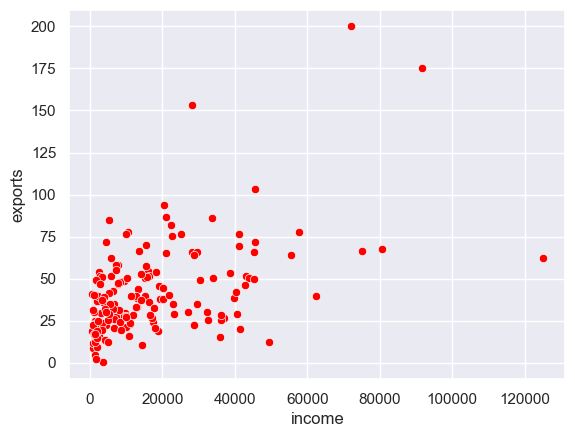

In [214]:
sns.scatterplot(data = countryData, x = "income", y = "exports", color = 'red')

Aналіз викидів для набору даних


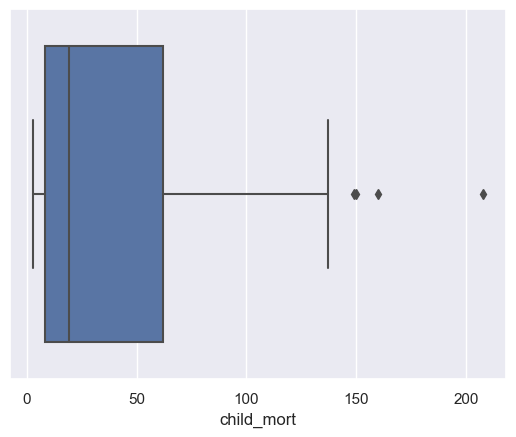

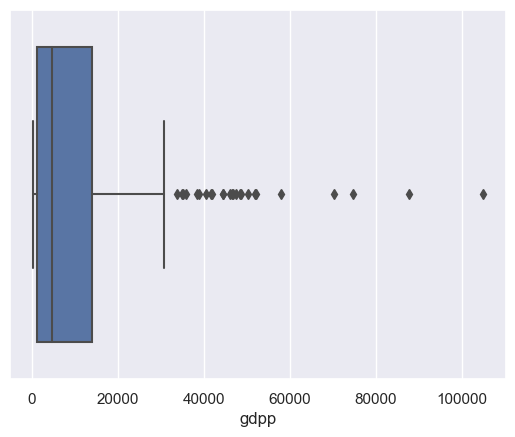

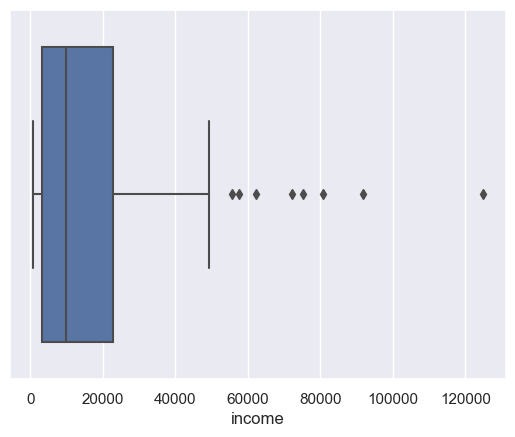

In [215]:
print('Aналіз викидів для набору даних')

fig = plt.figure()
sns.boxplot(x=countryData['child_mort'])
plt.show()
sns.boxplot(x=countryData['gdpp'])
plt.show()
sns.boxplot(x=countryData['income'])
plt.show()

In [216]:
clarifiedData = countryData[["country",'gdpp','child_mort','income']]
clarifiedData = clarifiedData[clarifiedData['gdpp'] < 55000]
clarifiedData = clarifiedData[clarifiedData['child_mort'] < 140]
clarifiedData = clarifiedData[clarifiedData['income'] < 50000]
clarifiedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 166
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     154 non-null    object 
 1   gdpp        154 non-null    int64  
 2   child_mort  154 non-null    float64
 3   income      154 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.0+ KB


Оптимізуємо методом K-mean


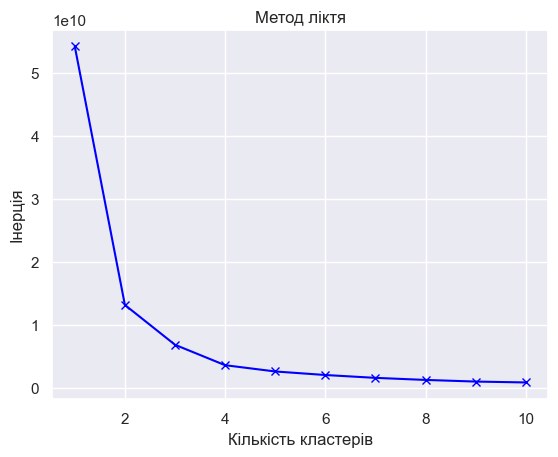

In [217]:
print('Оптимізуємо методом K-mean')
klst = list(zip(clarifiedData["gdpp"], clarifiedData["income"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klst)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='x', color = 'blue')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

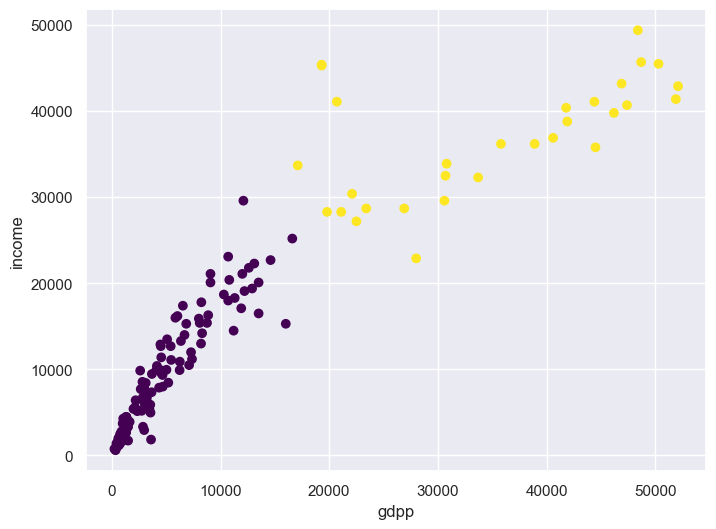

In [218]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(klst)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(clarifiedData["gdpp"], clarifiedData["income"], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('gdpp')
ax.set_ylabel('income')
plt.show()

In [219]:
clarifiedData.nsmallest(12, ['income', 'gdpp'])

,country,gdpp,child_mort,income
37,"Congo, Dem. Rep.",334,116.0,609
88,Liberia,327,89.3,700
26,Burundi,231,93.6,764
112,Niger,348,123.0,814
106,Mozambique,419,101.0,918
94,Malawi,459,90.5,1030
63,Guinea,648,109.0,1190
150,Togo,488,90.3,1210
126,Rwanda,563,63.6,1350
93,Madagascar,413,62.2,1390


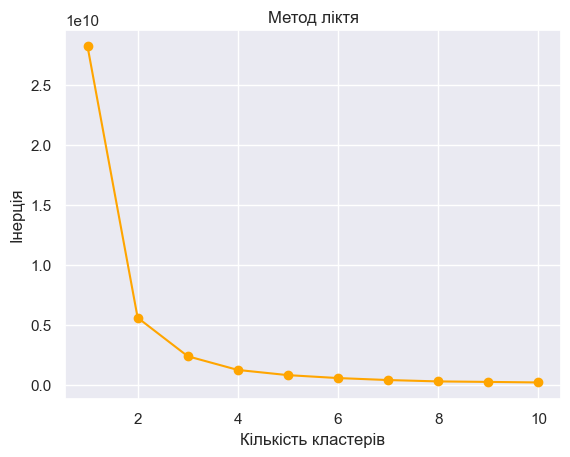

In [220]:
klst2 = list(zip(clarifiedData["gdpp"], clarifiedData["child_mort"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klst2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o', color='orange')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

Оптимізація отриманого k


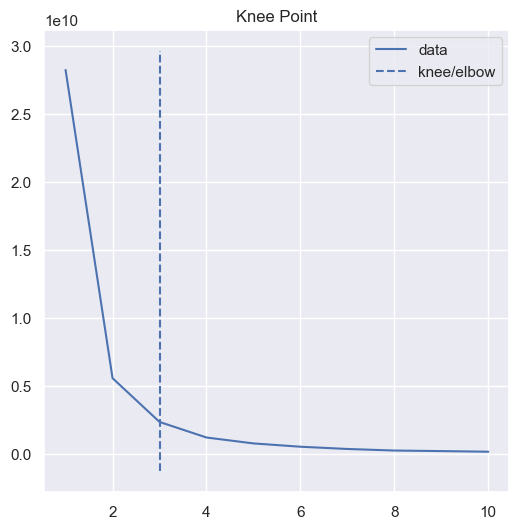

In [221]:
print('Оптимізація отриманого k')
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
kl.plot_knee()

Проведемо кластерцізацію


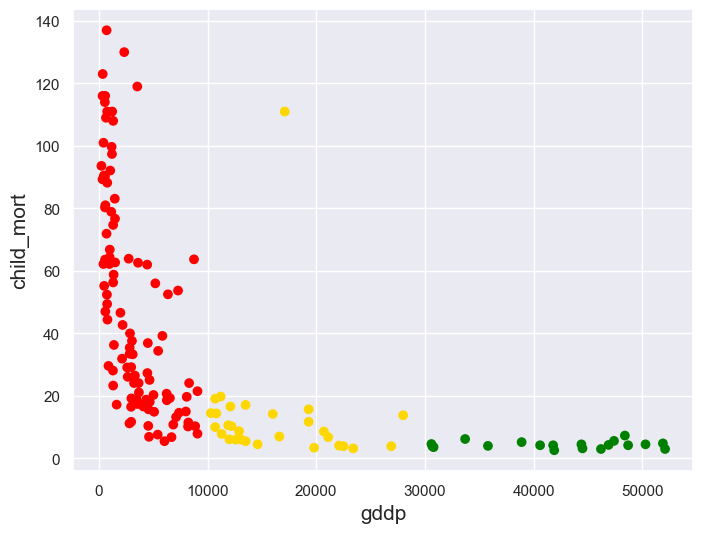

In [222]:
print('Проведемо кластерцізацію')
kmeans = KMeans(n_clusters=3)
kmeans.fit(klst2)
customcmap = ListedColormap(["gold", "green", "red"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(clarifiedData["gdpp"], clarifiedData["child_mort"], c=kmeans.labels_, cmap = customcmap)
ax.set_xlabel('gddp', fontsize=15)
ax.set_ylabel('child_mort', fontsize=15)
plt.show()


Text(0.5, 0, 'income')

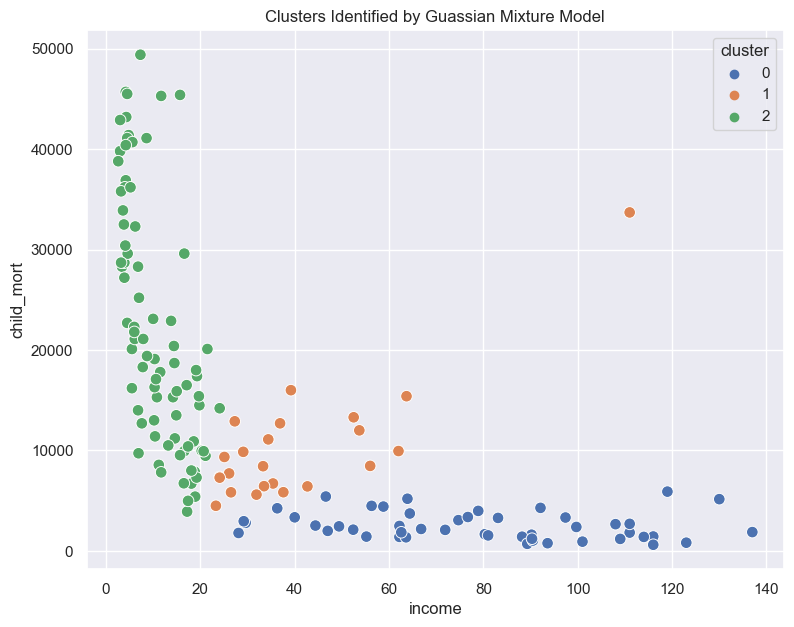

In [223]:
CI = clarifiedData[['child_mort', 'income']].copy()
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(CI)
cluster_labels = gmm_model.predict(CI)
CI = pd.DataFrame(CI)
CI['cluster'] = cluster_labels

fig, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(x='child_mort', y='income', data=CI, hue='cluster', palette="deep", s=70, ax = ax)
plt.title('Clusters Identified by Guassian Mixture Model')
plt.ylabel('child_mort')
plt.xlabel('income')

In [224]:
print('Виведемо 10 країн за найгіршими показниками')
badCount = clarifiedData[["country"]]
badCount=pd.merge(badCount,CI, left_index=True,right_index=True)
badCount.nsmallest(10, ['income', 'child_mort'])


Виведемо 10 країн за найгіршими показниками


,country,child_mort,income,cluster
37,"Congo, Dem. Rep.",116.0,609,0
88,Liberia,89.3,700,0
26,Burundi,93.6,764,0
112,Niger,123.0,814,0
106,Mozambique,101.0,918,0
94,Malawi,90.5,1030,0
63,Guinea,109.0,1190,0
150,Togo,90.3,1210,0
126,Rwanda,63.6,1350,0
93,Madagascar,62.2,1390,0


In [225]:
badCount['cluster'].value_counts(normalize=True)

2    0.532468
0    0.318182
1    0.149351
Name: cluster, dtype: float64

In [226]:
Cluster_child_mort=pd.DataFrame(CI.groupby(["cluster"]).child_mort.mean())
Cluster_income=pd.DataFrame(CI.groupby(["cluster"]).income.mean())
CMI = pd.concat([Cluster_child_mort,Cluster_income], axis=1)
CMI.columns = ["child_mort","income"]
CMI


,child_mort,income
cluster,,
0,78.665306,2487.653061
1,40.408696,10296.521739
2,10.778049,22376.951220


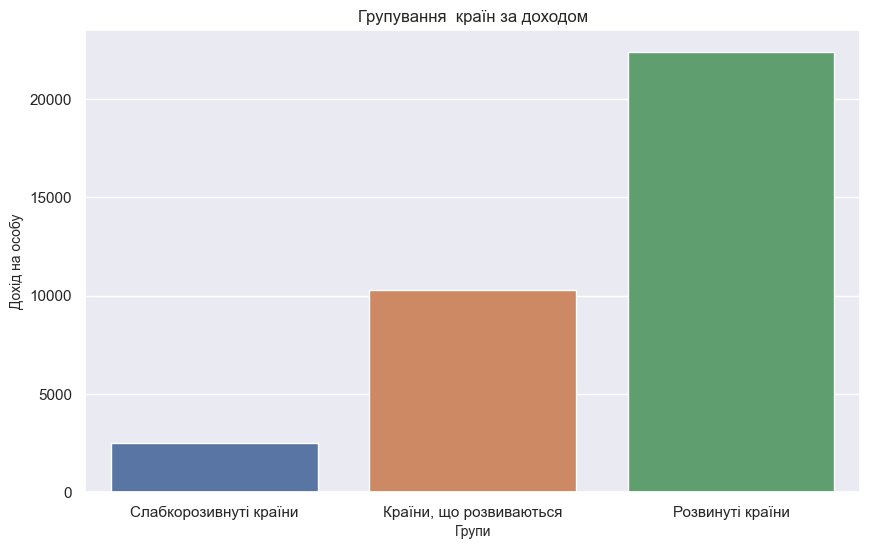

In [227]:
fig = plt.figure(figsize = (10,6))
CMI.rename(index={2: 'Розвинуті країни'},inplace=True)
CMI.rename(index={1: 'Країни, що розвиваються'},inplace=True)
CMI.rename(index={0: 'Слабкорозивнуті країни'},inplace=True)
s=sns.barplot(x=CMI.index,y='income',data=CMI)
plt.xlabel('Групи', fontsize=10)
plt.ylabel('Дохід на особу', fontsize=10)
plt.title('Групування  країн за доходом')
plt.show()


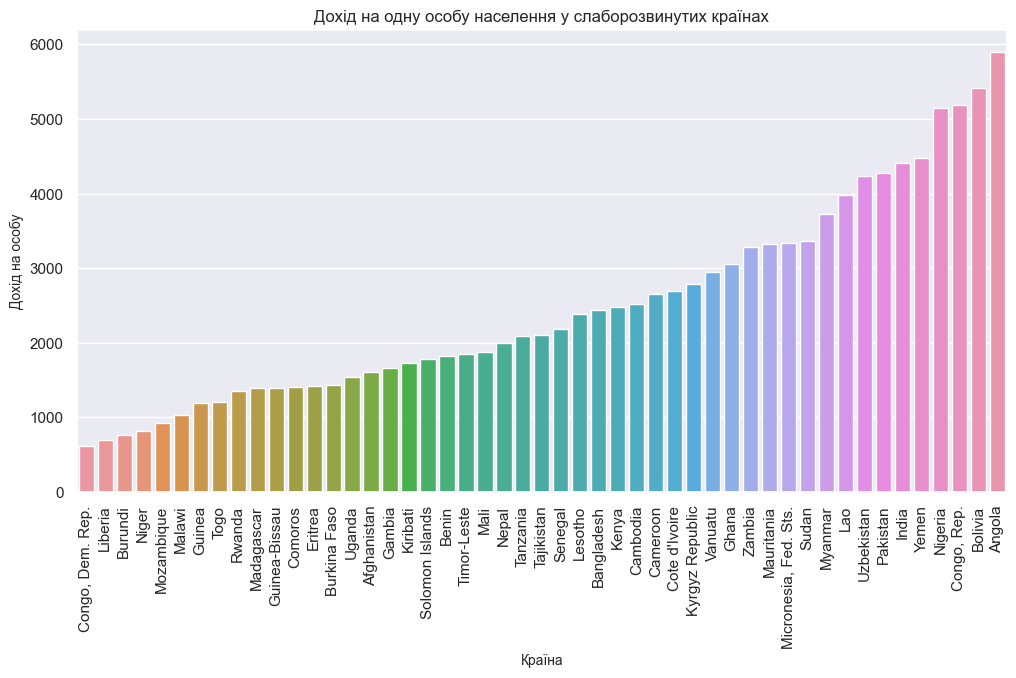

In [228]:
greatCon=badCount[badCount['cluster']==2]
normCon=badCount[badCount['cluster']==1]
badCon=badCount[badCount['cluster']==0]
badCon=badCon.sort_values(by = 'income')

fig = plt.figure(figsize = (12,6))
s=sns.barplot(x='country',y='income',data=badCon)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Країна', fontsize=10)
plt.ylabel('Дохід на особу', fontsize=10)
plt.title('Дохід на одну особу населення у слаборозвинутих країнах')
plt.show()